# Internet Advertisements Data Set

Abstract:
=
This dataset represents a set of possible advertisements on Internet pages


Data Set Information:
=
This dataset represents a set of possible advertisements on Internet pages. The features encode the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. The task is to predict whether an image is an advertisement ("ad") or not ("nonad").

Attribute Information:
=
(3 continous; others binary; this is the "STANDARD encoding" mentioned in the [Kushmerick, 99].)

One or more of the three continous features are missing in 28% of the instances; missing values should be interpreted as "unknown".



#### Python modules version used:

In [1]:
# Python version

import sys
print("Python: {}".format(sys.version))
#scipy
import scipy
print("Scipy: {}".format(scipy.__version__))
#pandas
import pandas as pd
print("Pandas: {}".format(pd.__version__))
#numpy
import numpy as np
print("Numpy: {}".format(np.__version__))
#matplotlib
import matplotlib
print("Matplotlib: {}".format(matplotlib.__version__))
#scikit-learn
import sklearn
print("Scikit-learn: {}".format(sklearn.__version__))

Python: 3.7.8 (tags/v3.7.8:4b47a5b6ba, Jun 28 2020, 08:53:46) [MSC v.1916 64 bit (AMD64)]
Scipy: 1.5.2
Pandas: 1.1.1
Numpy: 1.19.1
Matplotlib: 3.3.1
Scikit-learn: 0.23.2


### Importing libraries and toolkits

In [2]:
# Loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Dataset exploration

In [3]:
# Loading Dataset

df = pd.read_csv("add.csv", low_memory = False, header = 0)

In [4]:
# Dataset 

print(df)

      Unnamed: 0     0     1       2  3  4  5  6  7  8  ...  1549  1550  1551  \
0              0   125   125       1  1  0  0  0  0  0  ...     0     0     0   
1              1    57   468  8.2105  1  0  0  0  0  0  ...     0     0     0   
2              2    33   230  6.9696  1  0  0  0  0  0  ...     0     0     0   
3              3    60   468     7.8  1  0  0  0  0  0  ...     0     0     0   
4              4    60   468     7.8  1  0  0  0  0  0  ...     0     0     0   
...          ...   ...   ...     ... .. .. .. .. .. ..  ...   ...   ...   ...   
3274        3274   170    94  0.5529  0  0  0  0  0  0  ...     0     0     0   
3275        3275   101   140  1.3861  1  0  0  0  0  0  ...     0     0     0   
3276        3276    23   120  5.2173  1  0  0  0  0  0  ...     0     0     0   
3277        3277     ?     ?       ?  1  0  0  0  0  0  ...     0     0     0   
3278        3278    40    40       1  1  0  0  0  0  0  ...     0     0     0   

      1552  1553  1554  155

In [5]:
# Shape

print(df.shape)

(3279, 1560)


Rows: 3279 

Columns: 1559 

#### Removing unwanted column

In [6]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [7]:
# Typecasting all columns into integers

df.columns = df.columns.astype("int")

## Column information:

first three columns are important because most of variation can be seen 

column1 -> height of image

column2 -> width of image

column3 -> aspect ratio(proportional relationship between an image's width and height)


In [8]:
df.dtypes.head(3)

0    object
1    object
2    object
dtype: object

In [9]:
print(df.info()) #data set information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


### Information of First three continous variables

28% data is missing for three continous attributes

In [10]:
df.iloc[:, 0:3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3279 non-null   object
 1   1       3279 non-null   object
 2   2       3279 non-null   object
dtypes: object(3)
memory usage: 77.0+ KB


### Visualization of missing data
here '?' are string values for missing data

AxesSubplot(0.125,0.125;0.775x0.755)


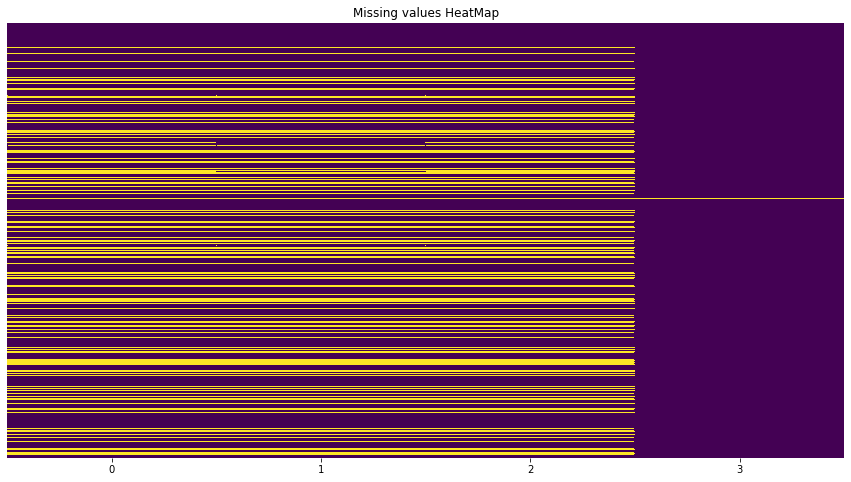

In [11]:
df1 = df.loc[:, [0,1, 2, 3]]
df1 = df1.applymap(lambda x:"?" in x)
plt.figure(figsize=(15,8))
plt.title("Missing values HeatMap")
print((sns.heatmap(df1, cbar=False, yticklabels = False, cmap = "viridis")))

#### Frequency of missing values

In [12]:
for i in df1:
    print('column[' + str(i) +'] has missing values -' + str(sum(df1[i])))

column[0] has missing values -903
column[1] has missing values -901
column[2] has missing values -910
column[3] has missing values -15


### Filling missing data with mean of each attribute

1. Fill missing values with the aggregated mean of non null values
2. convert data to float to get more precision

#### replace_missing(df) is replacing missing values for top 4 features with maximum variance

In [13]:
def replacing_missing(df):
    for i in df:
        df[i] = df[i].replace("[?]", np.NAN, regex = True).astype("float")
        df[i] = df[i].fillna(df[i].mean())
    return df

#### Calling replace_missing function in important features

In [14]:
df[[0, 1, 2, 3]] = replacing_missing(df.iloc[:, [0, 1, 2, 3]].copy()).values

#### Rounding off the values to Get a nominal output
Here Lambda function is used to convert float value into rounded decimal

In [15]:
df[3] = df[3].apply(lambda x : round(x))

## Exploratory Data Analysis(E.D.A)

### Statistical Approach

1. Data is right skewed

In [16]:
df[[1, 2, 3, 4]].describe()

,1,2,3,4
count,3279.000000,3279.000000,3279.000000,3279.000000
mean,155.344828,3.911953,0.768222,0.004270
std,110.729038,5.136153,0.422032,0.065212
min,1.000000,0.001500,0.000000,0.000000
25%,90.000000,1.279400,1.000000,0.000000
50%,150.000000,3.911953,1.000000,0.000000
75%,155.344828,3.911953,1.000000,0.000000
max,640.000000,60.000000,1.000000,1.000000


### Skewness

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

<AxesSubplot:xlabel='3', ylabel='Density'>

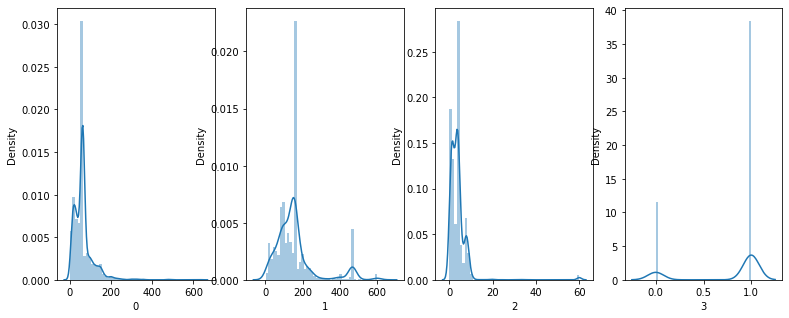

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 4)
fig.set_figheight(5)
fig.set_figwidth(13)
sns.distplot(df[0], ax = ax[0])
sns.distplot(df[1], ax = ax[1])
sns.distplot(df[2], ax = ax[2])
sns.distplot(df[3], ax = ax[3])

### Relations between three continous variables

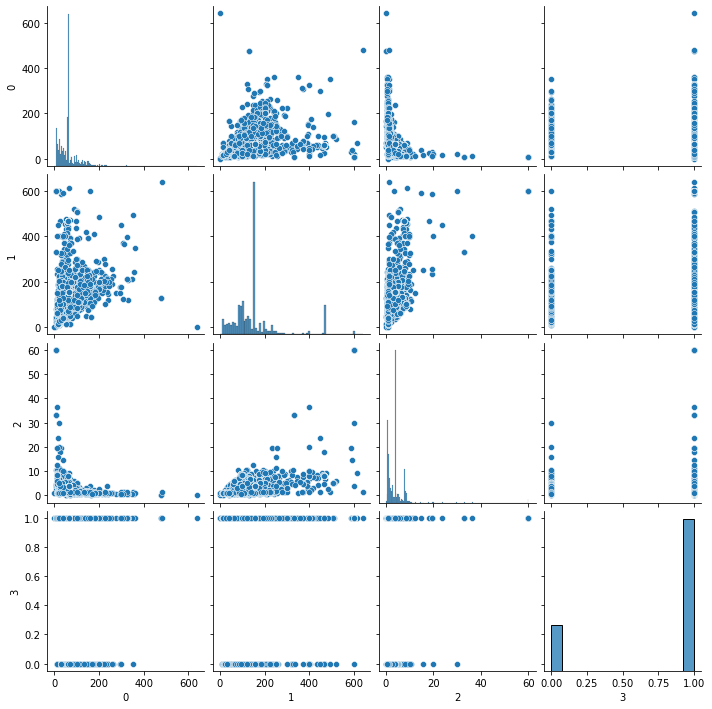

In [18]:
sns.pairplot(data = df.iloc[:, [0, 1, 2, 3, 1558]])

### Plotting discrete data
Strip plot is showing the variance in data

Plot is showing relation between each column and all features

add/non-ad vs Features


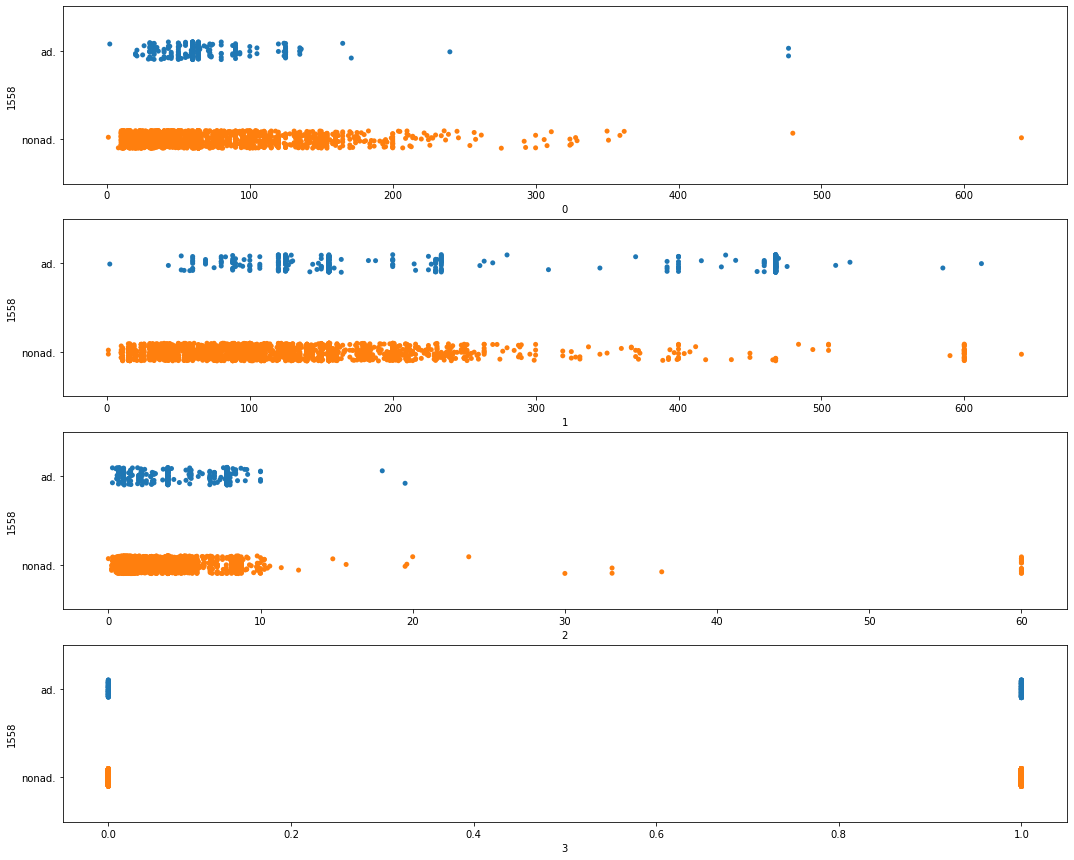

In [19]:
print("add/non-ad vs Features")
fig, ax = plt.subplots(nrows = 4, ncols = 1)
fig.set_figheight(15)
fig.set_figwidth(18)
sns.stripplot(y=1558,x=0,data=df,ax=ax[0])
sns.stripplot(y=1558,x=1,data=df,ax=ax[1])
sns.stripplot(y=1558,x=2,data=df,ax=ax[2])
sns.stripplot(y=1558,x=3,data=df,ax=ax[3])
plt.show()

### Frequency of target feature

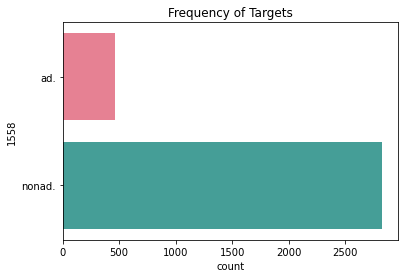

In [20]:
sns.countplot(data=df,y=1558,palette='husl')
plt.title("Frequency of Targets")
plt.show()

### Data and Central Tendoncy distribution
Boxplot is a great a way to show the distributions

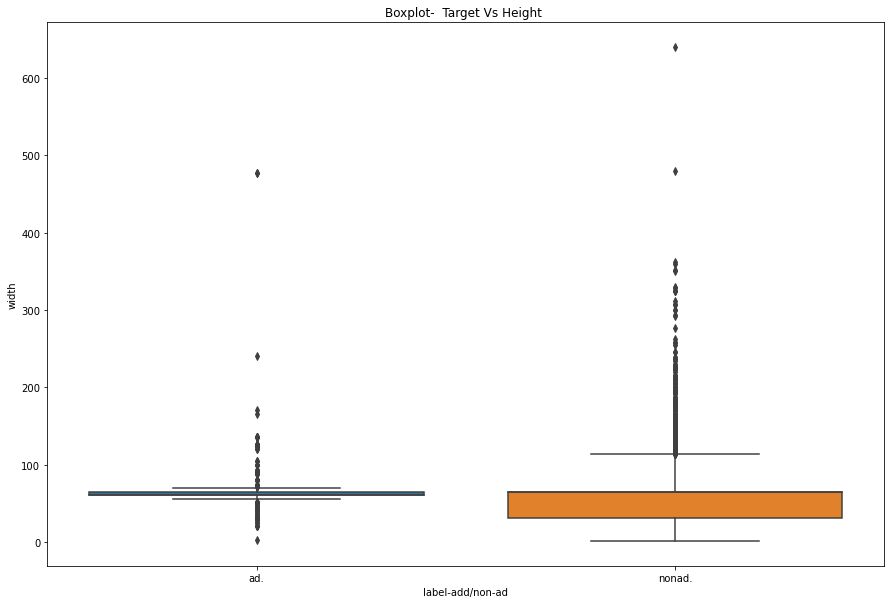

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=0,data=df)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot-  Target Vs Height ")
plt.show()

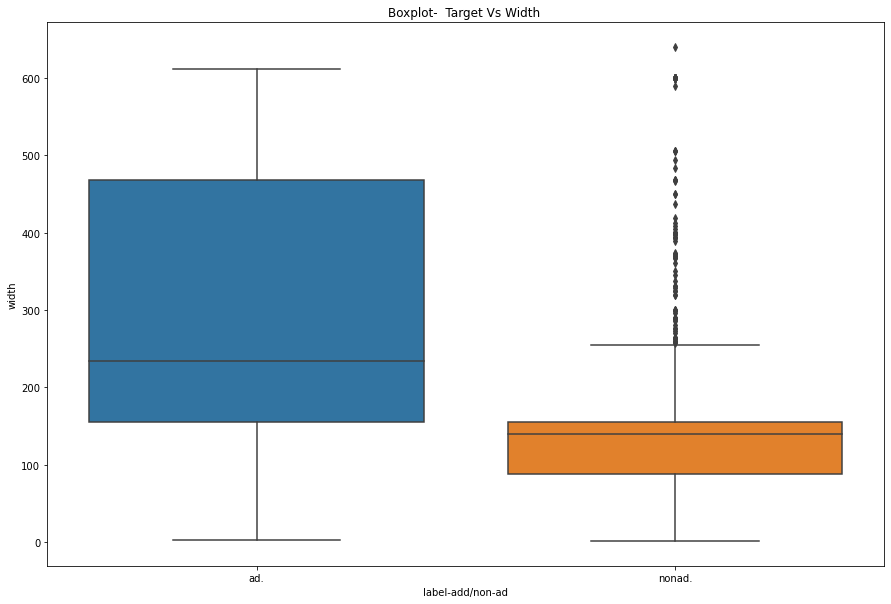

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=1,data=df)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot-  Target Vs Width ")
plt.show()

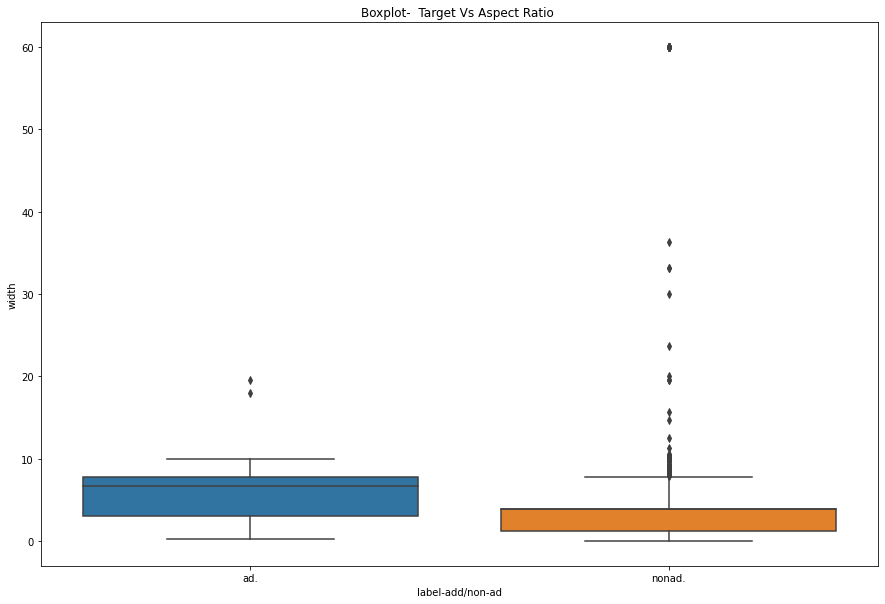

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=2,data=df)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot-  Target Vs Aspect Ratio ")
plt.show()

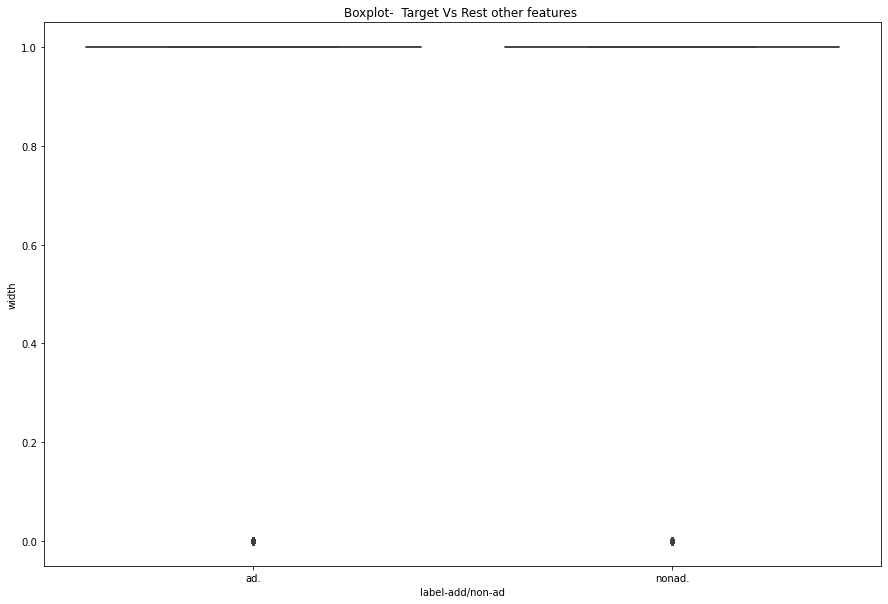

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=3,data=df)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot-  Target Vs Rest other features ")
plt.show()

From above boxplot we can conclude that the width of ad is much more than the width of non-ad.

Also, there are lot of outliers in width of non-ad target.

## Feature Engineering

Changing categorical target data to numerical form:

'0' - non advertisement image

'1' - addvertisement image

In [25]:
df.iloc[:, -1] = df.iloc[:, -1].replace(["ad.", "nonad."], [1, 0])

Preparing our model, where "x" stores features and "y" stores the labels(ad/non-ad)

In [26]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Scaling Data
Since the data is highly varied, scaling is needed to get all our data in a fixed range for better results.

In [27]:
scaled = StandardScaler()
X = scaled.fit_transform(x)

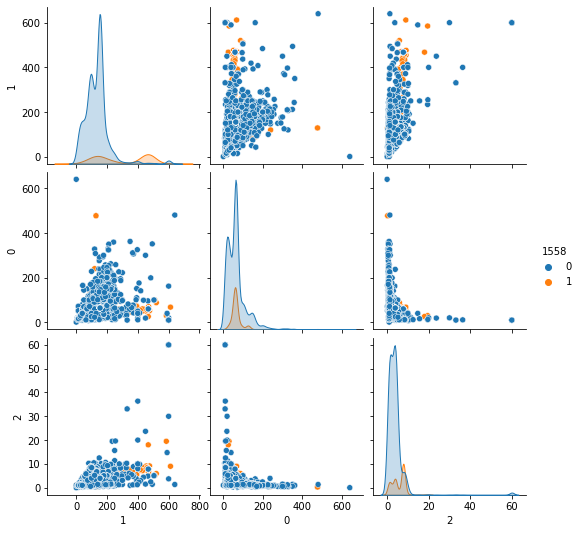

In [42]:
sns.pairplot(data=df.iloc[:,[1, 0,2, -1]],hue=1558)
plt.show()

So, after scaling EDA can be seen more clearly.

## Building Model Pipeline


### 1. Splitting of Dataset

In [153]:
# Spliting of training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify = y)

Now, I have training data in the X_train and y_train sets for training and preparing models, and a X_test and
y_test sets for testing our model accuracy and predictions.

### 2. Model Selection

We don’t know which algorithms would be good on this problem or what configurations to use.

Let’s test 6 different algorithms:

1)Logistic Regression (LR)

2)Linear Discriminant Analysis (LDA)

3)K-Nearest Neighbors (KNN).

4)Classification and Regression Trees (CART).

5)Gaussian Naive Bayes (NB).

6)Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [154]:
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    print("{}: {:.6f}({:.6f})".format(name, cv_results.mean(), cv_results.std()))

LR: 0.958930(0.011695)
LDA: 0.963810(0.010967)
KNN: 0.952832(0.009634)
CART: 0.956487(0.012062)
NB: 0.774302(0.016535)
SVM: 0.963811(0.007357)


As we can see, Support Vector Machine(SVM) and Linear Discriminant Analysis (LDA) have almost same accuracy 96.38%, but the standard deviation value of SVM is lower, making the dataset closer to mean.

So, SVM looks like a better suit for the model.

First let's see the result in visualiztion:

Text(0.5, 1.0, 'Algorithm Comparison')

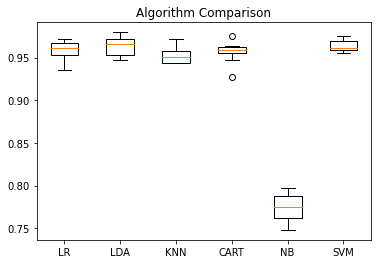

In [155]:
# Compare Algorithms

plt.boxplot(results, labels = names)
plt.title("Algorithm Comparison")

From the boxplots, we can see that most models have an accuracy of 95% and above, with exception Gaussian Naive Bayes(NB) to have a accuracy less than 80%. 

So, as you can see the LDA model has a larger interquartile range than the SVM model, making the SVM the best model for the model dataset classification.

So, The best model for this classification dataset is SVM

### 3. Evaluating Prediction

In [156]:
# Make predictions on test set

model = SVC(gamma = "auto")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [157]:
# Evaluate predictions

print(accuracy_score(y_test, y_pred))

0.9707317073170731


Our model predicts a score of 0.9707 or about 97.1% accuracy on our hold out set(test set).

### Confusion Matrix
So, Confusion Matrix shows that higher the diagonal values in the confusion matrix the better, indicating many
correct predictions.

So let's check our model using this confusion matrix

In [158]:
print(confusion_matrix(y_test, y_pred))

[[703   2]
 [ 22  93]]


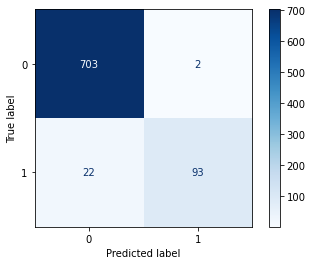

In [159]:
disp = plot_confusion_matrix(model, X_test, y_test,
                            cmap = plt.cm.Blues)
plt.show()

### Classification Report 

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       705
           1       0.98      0.81      0.89       115

    accuracy                           0.97       820
   macro avg       0.97      0.90      0.93       820
weighted avg       0.97      0.97      0.97       820



The Classification Report gives us the breakdown of each class(ad, non-ad) by
precision, recall, f1-score and support showing excellent results.